# Cycloids

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Straight Roll

Suppose we have a disk that rolls across the $x$-axis of an $xy$-plane without slipping or sliding.  At $t=0$, the disk is centered at $(0,a)$, where $a$ is the radius of said disk.  Let $A$ be a point on the edge of the disk that is at origin when $t=0$, $\mathbf{r}$ be the position vector that tracks $A$, and $\omega$ be the angular velocity of the disk as it rolls.

$$ \omega = \frac{\mathrm{d}\theta}{\mathrm{d}t} \quad\quad \mathbf{b} = \langle 0,a\rangle \quad\quad \mathbf{r} := \mathbf{r}(t) = \mathbf{a} + \mathbf{b} + \mathbf{c} $$

$$ \mathbf{a} := \mathbf{a}(\theta) = a\langle \cos \theta,\sin \theta\rangle \quad\quad\text{and}\quad\quad \mathbf{c} = \big\langle -a\Delta \theta, 0\big\rangle$$

$$ \theta := \theta(t) = \omega t - 0.5\pi \quad\quad\text{and}\quad\quad \Delta \theta = \theta -\theta_0 = \theta + 0.5\pi $$

$$ \mathbf{r} = \mathbf{r}(t) = \big\langle x(t),y(t)\big\rangle $$

$$ x:=x(t) = a\cos\theta(t) - a\big(\theta(t) + 0.5\pi\big) \quad\quad y:=y(t) = a\sin\theta(t) + a$$

$$ x = a\big(\cos\theta - \theta - 0.5\pi\big)\quad\quad\text{and}\quad\quad y = a(\sin\theta + 1)$$

$$ x = a(\cos\theta - \omega t)$$

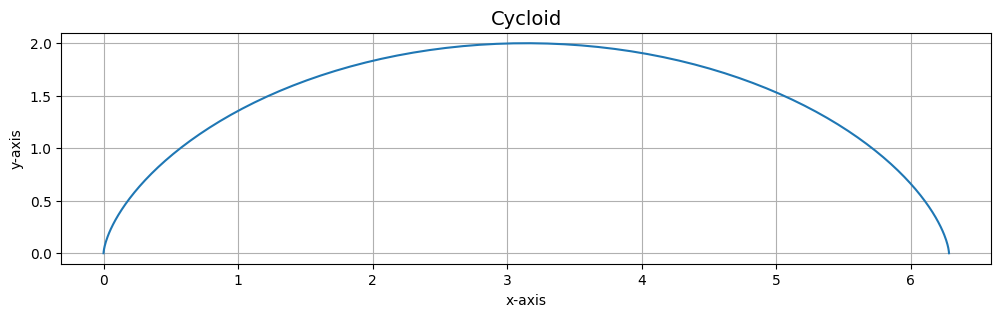

In [5]:
# Define certain parameters
omega = w = -2*np.pi
a = 1

# Define the domain of our cycloid.
t = np.linspace(0,1,num=200)
theta = omega*t - 0.5*np.pi

# Define the parametrization.
x = a*(np.cos(theta) - omega*t)
y = a*(np.sin(theta) + 1)

# Create the figure and axes objects.
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Cycloid',size=14)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.grid()

# Plot the cycloid.
ax.plot(x,y)

## Length

Now, let's try to find the length of the cycloid parametrized by the above two equations as a function of time or angle.

The length of the cycloid from $t=0$ to $t=0$ is:  

$$ L = \int_C\,\mathrm{d}s = \int_C \sqrt{(\mathrm{d}x)^2 + (\mathrm{d}y)^2}$$

$$ x'(t) = -a\omega\sin\theta - a\omega = -a\omega(\sin\theta-1) \quad\quad\text{and}\quad\quad y'(t) = a\omega\cos\theta$$

$$ \mathrm{d}x = -a\omega(\sin\theta-1)\,\mathrm{d}t \quad\quad\text{and}\quad\quad \mathrm{d}y = a\omega\cos\theta\,\mathrm{d}t$$

$$ (\mathrm{d}x)^2 = (a\omega)^2\big(\sin^2\theta - 2\sin\theta + 1\big)\,(\mathrm{d}t)^2 \quad\quad\text{and}\quad\quad (\mathrm{d}y)^2 = (a\omega)^2\cos^2\theta\,(\mathrm{d}t)^2$$

$$ \sqrt{(\mathrm{d}x)^2 + (\mathrm{d}y)^2} = a\omega\sqrt{2 - 2\sin\theta}\,\mathrm{d}t$$

$$ \sin\theta = \cos \omega t$$

$$ \sin 2\theta = 2\cos\theta\sin\theta$$

$$ \frac{\mathrm{d}\sin^2\theta}{\mathrm{d}\theta} = 2\cos\theta\sin\theta = \sin2\theta$$

$$ \int\sin2\theta\,\mathrm{d}\theta = K-0.5\cos2\theta$$

$$ K-0.5\cos2\theta = \sin^2\theta \quad\quad K = 0.5$$

$$ 1-\cos2\theta = 2\sin^2\theta \quad\therefore\quad \cos2\theta = 1-2\sin^2\theta$$

$$ \cos\omega t = 1 - 2\sin^2(0.5\omega t)$$

$$ 2 - 2\sin\theta = 4\sin^2(0.5\omega t)$$

$$ a\omega \sqrt{2-2\sin\theta}\,\mathrm{d}t = 2a\omega|\sin(0.5\omega t)|\,\mathrm{d}t$$

Finally,  

$$ L = 2a\omega\int_0^1|\sin(0.5\omega t)|\,\mathrm{d}t$$

Assuming $a=1$ and $\omega=2\pi$,  

$$ L = 4\pi \int_0^1 \sin(\pi t)\,\mathrm{d}t = -4\big.\big(\cos(\pi t)\big)\big]_0^1$$

$$ = 8$$